In [1]:
!wget "https://storage.googleapis.com/kaggle-data-sets/500984/961003/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP%2BRYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV3lw5bKNDvwQRsscHZ%2BXMk0K1Z35aOxyBBmCyv0cdIWKhyiSVi298%2BngfKoB6LUE%2FJE4oxtj70dnZlYEfbMS9KFwPuTiXkK3ThaD3BpmeBSPOaPE%2B7JXFiihNQbwQnYg%2B33Z2CWdKNpB744DuYoVyqW2adwG2j40LVFL6qroU0XpjsHULQMqC4wytW1kcKTCS6Mhset4Nv8Htd7J5cOQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dnaruto-hand-sign-dataset.zip"

The name is too long, 530 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP+RYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV.
--2020-03-02 17:17:20--  https://storage.googleapis.com/kaggle-data-sets/500984/961003/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP%2BRYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV3lw5bKNDvwQRsscHZ%2BXMk0K1Z35aOxyBBmCyv0cdIWKhyiSVi298%2BngfKoB6LUE%2FJE4oxtj70dnZlYEfbMS9KFwPuTiXkK3ThaD3BpmeBSPOaPE%2B7JXFiihNQbwQnYg%2B33Z2CWdKNpB744DuYoVyqW2adwG2j40LVFL6qroU0XpjsHULQMqC4wytW1kcKTCS6Mhset4Nv8Htd7J5cOQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dnaruto-hand-sign-dataset.zip
Resolving storage.googleapis.com (storage.googl

In [2]:
!unzip arc.zip

Archive:  arc.zip
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_0a5ad922e-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_0d3176320-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_1b0fea37a-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_1dc80f91c-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_02a62b902-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_05eee5bea-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_13074c5c4-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_16519402a-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_236293c2a-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_

In [3]:
from fastai import *
from fastai.vision import *
from tqdm import tqdm_notebook as tqdm
import os
import cv2

import random
import numpy as np
import keras
from random import shuffle
from keras.utils import np_utils
from shutil import unpack_archive
import matplotlib.pyplot as plt
import math
import os
import tensorflow as tf

%reload_ext autoreload
%autoreload 2
%matplotlib inline


video_path="/kaggle/input/test-video-for-testing-naruto-hand-sign-detection/demo input for naruto hand detection.mp4"

Using TensorFlow backend.


In [0]:
path = Path('Pure Naruto Hand Sign Data/')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='./train', test='./test', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
from fastai.metrics import error_rate 

#acc_02 = partial(accuracy_thresh, thresh=0.2)
#F1 = MultiLabelFbeta(beta=1, average="macro")
#learn = create_cnn(data, arch, metrics=[acc_02, f_score], model_dir='/tmp/models')
#learn = cnn_learner(data, models.resnet50 , metrics=[accuracy, error_rate, FBeta(average=‘macro’)], model_dir='/kaggle/working/models')
learner = cnn_learner(data, models.resnet50 , metrics=[accuracy, error_rate, FBeta(beta=1, average="macro")], model_dir='/models')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


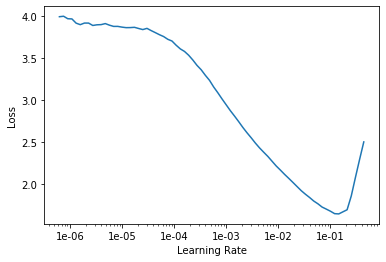

In [7]:
learner.lr_find()

learner.recorder.plot()

In [8]:


learner.fit_one_cycle(5, 2e-3)


epoch,train_loss,valid_loss,accuracy,error_rate,f_beta,time
0,1.503289,0.198514,0.921114,0.078886,0.921308,01:46
1,0.745651,0.056433,0.976798,0.023202,0.977321,01:46
2,0.419528,0.016419,0.997680,0.002320,0.998214,01:46
3,0.249277,0.015687,0.995360,0.004640,0.995643,01:45
4,0.164712,0.021772,0.993039,0.006961,0.993063,01:46


epoch,train_loss,valid_loss,accuracy,error_rate,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


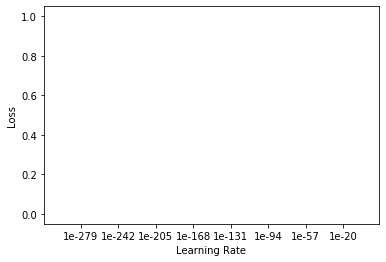

In [9]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [10]:
learner.fit_one_cycle(8, slice(1e-04))

epoch,train_loss,valid_loss,accuracy,error_rate,f_beta,time
0,0.045504,0.014782,0.995360,0.004640,0.995643,01:47
1,0.042389,0.010413,0.997680,0.002320,0.998214,01:47
2,0.031351,0.010077,0.997680,0.002320,0.998214,01:47
3,0.028208,0.008006,0.997680,0.002320,0.998214,01:47
4,0.031008,0.006722,0.997680,0.002320,0.998214,01:47
5,0.023667,0.005472,0.997680,0.002320,0.998214,01:47
6,0.021465,0.006028,0.997680,0.002320,0.998214,01:46
7,0.019877,0.005880,0.997680,0.002320,0.998214,01:45


In [0]:
learner.save('Stage-2-Hand-Sign-detection-rs50')
#learn.export('Hand-Sign-detection-stage-2') 

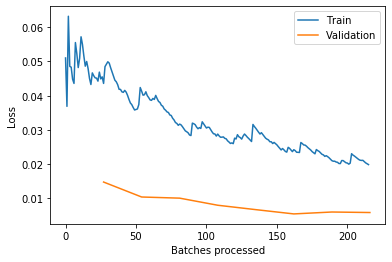

In [12]:
learner.recorder.plot_losses()

In [13]:

preds, y, losses = learner.get_preds(ds_type=DatasetType.Test, with_loss=True)
labels  = torch.argmax(preds, dim=1)
test_predictions_direct = [data.classes[int(x)] for x in labels]
test_predictions_direct

['boar',
 'boar',
 'boar',
 'boar',
 'boar',
 'boar',
 'boar',
 'boar',
 'dragon',
 'dragon',
 'zero',
 'zero',
 'zero',
 'zero',
 'zero',
 'ram',
 'ram',
 'bird',
 'ram',
 'bird',
 'horse',
 'horse',
 'horse',
 'horse',
 'horse',
 'hare',
 'bird',
 'ox',
 'ox',
 'ox',
 'ox',
 'ox',
 'rat',
 'rat',
 'rat',
 'rat',
 'dragon',
 'bird',
 'bird',
 'bird',
 'bird',
 'monkey',
 'monkey',
 'hare',
 'monkey',
 'monkey',
 'tiger',
 'tiger',
 'tiger',
 'tiger',
 'tiger',
 'hare',
 'hare',
 'hare',
 'hare',
 'zero',
 'bird',
 'hare',
 'hare',
 'hare',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'snake',
 'snake',
 'snake',
 'snake',
 'snake',
 'dragon',
 'dragon',
 'dragon',
 'dragon',
 'dragon',
 'dragon',
 'dragon',
 'dragon',
 'dragon',
 'dragon']

In [23]:
img = learner.data.test_ds[8][0]
learner.predict(img)

(Category dragon,
 tensor(3),
 tensor([7.4993e-04, 4.6407e-01, 5.1716e-04, 4.6468e-01, 1.2511e-02, 4.5805e-04,
         3.3318e-03, 3.6547e-03, 8.6810e-04, 4.2135e-03, 5.3896e-04, 1.1839e-04,
         4.4295e-02]))

In [25]:
learner.data.test_ds[8][1]

EmptyLabel 

In [0]:
def evaluate_model_from_interp(interp, data):
    # perform a "manual" evaluation of the model to take a look at predictions vs. labels and to
    # re-compute accuracy from scratch (to double check and also because I didn't find a quick way
    # to extract accuracy inside the guts of Fast.ai after a call to validate() on the test set...)
    print(f'Interp has {len(interp.y_true)} ground truth labels: {interp.y_true}')
    print(f'Interp yielded {len(interp.preds)} raw predictions. First two raw predictions are: {interp.preds[:2]}')
    print(f'The problem had {len(data.classes)} classes: {data.classes}') # data.c is just len(data.classes)
    
    print('')
    print(f'Pred -> GroundTruth = PredLabel -> GroundTruthLabel')
    
    ok_pred = 0
    
    for idx, raw_p in enumerate(interp.preds):
        pred = np.argmax(raw_p)
        if idx < 10:
           print(f'{pred} -> {interp.y_true[idx]} = {data.classes[pred]} -> {data.valid_ds.y[idx]}')
        if pred == interp.y_true[idx]:
           ok_pred += 1
    
    acc = ok_pred / len(interp.y_true)
    print(f'Overall accuracy of the model: {acc:0.5f}')

In [0]:
evaluate_model_from_interp(interp, data_test)

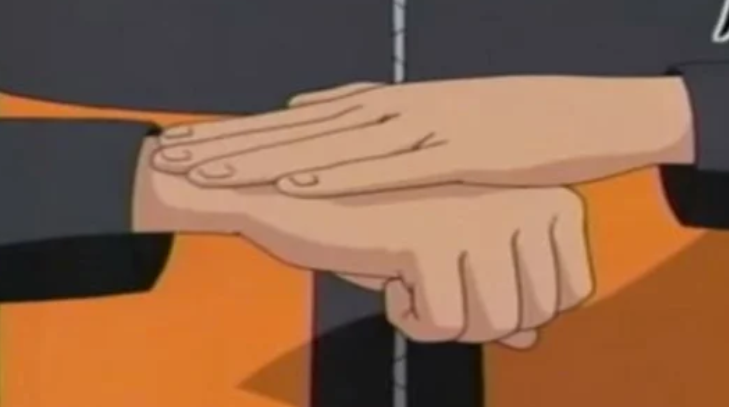

In [37]:
img_dog_test = open_image("dog.PNG")
img_dog_test


In [38]:
pred= learner.predict(img_dog_test)
pred

(Category dog,
 tensor(2),
 tensor([4.4829e-05, 2.1880e-06, 9.9632e-01, 2.7019e-07, 1.3057e-05, 4.4435e-06,
         1.6887e-04, 1.3629e-05, 3.8493e-07, 3.7059e-04, 3.0578e-03, 5.8032e-07,
         1.8948e-06]))

In [33]:
img = open_image("horse.jfif")
pred= learner.predict(img)
pred

(Category horse,
 tensor(5),
 tensor([1.3402e-02, 4.4505e-03, 1.9549e-03, 9.6106e-06, 2.7202e-02, 8.1329e-01,
         2.7745e-05, 1.9571e-02, 1.7602e-04, 3.4344e-03, 1.1507e-02, 3.7312e-04,
         1.0460e-01]))

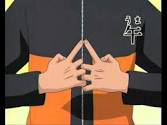

In [35]:
img

In [0]:
learner.path=Path("")
learner.export("Naruto-resnet50-model.pkl")